# **Import Library yang dibutuhkan**

In [3]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


# **Load Dataset**

In [4]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Bibit_1.csv")
df.head()

,userName,score,at,content
0,Pengguna Google,4,2024-07-20 23:43:31,Saya harap kedepan nya apk nya memberikan fitu...
1,Pengguna Google,5,2024-07-20 13:53:18,is ok
2,Pengguna Google,5,2024-07-20 12:52:39,Kak bibit harus ada yg buat beli crypto
3,Pengguna Google,4,2024-07-20 12:10:37,"bagus, tp pencairannya nunggu beberapa hari, h..."
4,Pengguna Google,4,2024-07-20 07:43:54,Menyesal pake bibit. Ini apk gak ramah buat yg...


In [5]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,Saya harap kedepan nya apk nya memberikan fitu...
1,is ok
2,Kak bibit harus ada yg buat beli crypto
3,"bagus, tp pencairannya nunggu beberapa hari, h..."
4,Menyesal pake bibit. Ini apk gak ramah buat yg...
...,...
2495,mantap
2496,Mudah berinvestasi dengan Bibit
2497,bagus
2498,jangan beli sbn.. katanya klo maw jual kapan s...


In [6]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2500 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [7]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2500
unique,2097
top,bagus
freq,63


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [8]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2500, 1)

In [9]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [10]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [11]:
# Menghapus data yang kosong

df = df.dropna()

In [12]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content    0
dtype: int64

In [13]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(2097, 1)

In [14]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [15]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [16]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,cleaning
0,Saya harap kedepan nya apk nya memberikan fitu...,saya harap kedepan nya apk nya memberikan fitu...
1,is ok,is ok
2,Kak bibit harus ada yg buat beli crypto,kak bibit harus ada yg buat beli crypto
3,"bagus, tp pencairannya nunggu beberapa hari, h...",bagus tp pencairannya nunggu beberapa hari ham...
4,Menyesal pake bibit. Ini apk gak ramah buat yg...,menyesal pake bibit ini apk gak ramah buat yg ...
...,...,...
2493,"Kata nya tidak ada biaya tersembunyi, tapi beg...",kata nya tidak ada biaya tersembunyi tapi begi...
2494,"Pelayanannya baik, tapi tidak menyelesaikan ma...",pelayanannya baik tapi tidak menyelesaikan mas...
2496,Mudah berinvestasi dengan Bibit,mudah berinvestasi dengan bibit
2498,jangan beli sbn.. katanya klo maw jual kapan s...,jangan beli sbn katanya klo maw jual kapan saj...


# **Normalization**

In [17]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "gbs" : "gabisa",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,Saya harap kedepan nya apk nya memberikan fitu...,saya harap kedepan nya apk nya memberikan fitu...,saya harap kedepan nya aplikasi nya memberikan...
1,is ok,is ok,is ok
2,Kak bibit harus ada yg buat beli crypto,kak bibit harus ada yg buat beli crypto,kak bibit harus ada yang buat beli crypto
3,"bagus, tp pencairannya nunggu beberapa hari, h...",bagus tp pencairannya nunggu beberapa hari ham...,bagus tp pencairannya nunggu beberapa hari ham...
4,Menyesal pake bibit. Ini apk gak ramah buat yg...,menyesal pake bibit ini apk gak ramah buat yg ...,menyesal pake bibit ini aplikasi tidak ramah b...
...,...,...,...
2493,"Kata nya tidak ada biaya tersembunyi, tapi beg...",kata nya tidak ada biaya tersembunyi tapi begi...,kata nya tidak ada biaya tersembunyi tapi begi...
2494,"Pelayanannya baik, tapi tidak menyelesaikan ma...",pelayanannya baik tapi tidak menyelesaikan mas...,pelayanannya baik tapi tidak menyelesaikan mas...
2496,Mudah berinvestasi dengan Bibit,mudah berinvestasi dengan bibit,mudah berinvestasi dengan bibit
2498,jangan beli sbn.. katanya klo maw jual kapan s...,jangan beli sbn katanya klo maw jual kapan saj...,jangan beli sbn katanya kalau maw jual kapan s...


# **Stopwords**

In [18]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [19]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "bisa", "ga",
                   "udah", "tapi", "sudah", "gak", "lagi", "sama", "lebih"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,Saya harap kedepan nya apk nya memberikan fitu...,saya harap kedepan nya apk nya memberikan fitu...,saya harap kedepan nya aplikasi nya memberikan...,harap kedepan aplikasi memberikan fitur via da...
1,is ok,is ok,is ok,is ok
2,Kak bibit harus ada yg buat beli crypto,kak bibit harus ada yg buat beli crypto,kak bibit harus ada yang buat beli crypto,kak bibit harus yang buat beli crypto
3,"bagus, tp pencairannya nunggu beberapa hari, h...",bagus tp pencairannya nunggu beberapa hari ham...,bagus tp pencairannya nunggu beberapa hari ham...,bagus tp pencairannya nunggu beberapa hari ham...
4,Menyesal pake bibit. Ini apk gak ramah buat yg...,menyesal pake bibit ini apk gak ramah buat yg ...,menyesal pake bibit ini aplikasi tidak ramah b...,menyesal pake bibit aplikasi ramah buat nyimpe...
...,...,...,...,...
2493,"Kata nya tidak ada biaya tersembunyi, tapi beg...",kata nya tidak ada biaya tersembunyi tapi begi...,kata nya tidak ada biaya tersembunyi tapi begi...,kata biaya tersembunyi begitu jual aset dijual...
2494,"Pelayanannya baik, tapi tidak menyelesaikan ma...",pelayanannya baik tapi tidak menyelesaikan mas...,pelayanannya baik tapi tidak menyelesaikan mas...,pelayanannya baik tidak menyelesaikan masalah
2496,Mudah berinvestasi dengan Bibit,mudah berinvestasi dengan bibit,mudah berinvestasi dengan bibit,mudah berinvestasi bibit
2498,jangan beli sbn.. katanya klo maw jual kapan s...,jangan beli sbn katanya klo maw jual kapan saj...,jangan beli sbn katanya kalau maw jual kapan s...,jangan beli sbn katanya kalau maw jual saja ga...


# **Tokenize**

In [20]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,Saya harap kedepan nya apk nya memberikan fitu...,saya harap kedepan nya apk nya memberikan fitu...,saya harap kedepan nya aplikasi nya memberikan...,harap kedepan aplikasi memberikan fitur via da...,"[harap, kedepan, aplikasi, memberikan, fitur, ..."
1,is ok,is ok,is ok,is ok,"[is, ok]"
2,Kak bibit harus ada yg buat beli crypto,kak bibit harus ada yg buat beli crypto,kak bibit harus ada yang buat beli crypto,kak bibit harus yang buat beli crypto,"[kak, bibit, harus, yang, buat, beli, crypto]"
3,"bagus, tp pencairannya nunggu beberapa hari, h...",bagus tp pencairannya nunggu beberapa hari ham...,bagus tp pencairannya nunggu beberapa hari ham...,bagus tp pencairannya nunggu beberapa hari ham...,"[bagus, tp, pencairannya, nunggu, beberapa, ha..."
4,Menyesal pake bibit. Ini apk gak ramah buat yg...,menyesal pake bibit ini apk gak ramah buat yg ...,menyesal pake bibit ini aplikasi tidak ramah b...,menyesal pake bibit aplikasi ramah buat nyimpe...,"[menyesal, pake, bibit, aplikasi, ramah, buat,..."
...,...,...,...,...,...
2493,"Kata nya tidak ada biaya tersembunyi, tapi beg...",kata nya tidak ada biaya tersembunyi tapi begi...,kata nya tidak ada biaya tersembunyi tapi begi...,kata biaya tersembunyi begitu jual aset dijual...,"[kata, biaya, tersembunyi, begitu, jual, aset,..."
2494,"Pelayanannya baik, tapi tidak menyelesaikan ma...",pelayanannya baik tapi tidak menyelesaikan mas...,pelayanannya baik tapi tidak menyelesaikan mas...,pelayanannya baik tidak menyelesaikan masalah,"[pelayanannya, baik, tidak, menyelesaikan, mas..."
2496,Mudah berinvestasi dengan Bibit,mudah berinvestasi dengan bibit,mudah berinvestasi dengan bibit,mudah berinvestasi bibit,"[mudah, berinvestasi, bibit]"
2498,jangan beli sbn.. katanya klo maw jual kapan s...,jangan beli sbn katanya klo maw jual kapan saj...,jangan beli sbn katanya kalau maw jual kapan s...,jangan beli sbn katanya kalau maw jual saja ga...,"[jangan, beli, sbn, katanya, kalau, maw, jual,..."


# **Stemming**

In [21]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# df['steamming'] = df['tokenized'].apply(stemming)

# df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Bibit_1.csv', index = False)


In [22]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Bibit_1.csv', encoding = 'latin1')
df_steamming

,steamming
0,harap depan apk beri fitur via dana dalam tran...
1,is ok
2,kak bibit harus yang buat beli crypto
3,bagus tp cair nunggu beberapa hari hampir minggu
4,sesal pake bibit apk ramah buat nyimpen duit s...
...,...
2092,kata biaya sembunyi tapi begitu jual aset jual...
2093,layan baik tapi selesai masalah
2094,mudah investasi bibit
2095,jangan beli saham kata klo mau jual saja gampa...


# **Translate**

In [23]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [24]:
# import pandas as pd
# from easynmt import EasyNMT

In [25]:
# # Load Data Hasil Stemming

# df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Bibit_1.csv', encoding = 'latin1')


In [26]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [27]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [28]:
# # Imputing NaN Values

# df_values = df_steamming.fillna(method = 'pad')
# df_values

In [29]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Bibit_1.csv')

In [30]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Bibit_1.csv', index_col=0)
df_values

,steamming,steamming_en
0,harap depan apk beri fitur via dana dalam tran...,Please advance apk features via funds in the t...
1,is ok,is ok
2,kak bibit harus yang buat beli crypto,A seed brother should make a crypto.
3,bagus tp cair nunggu beberapa hari hampir minggu,It's nice. But the liquid waits a few days. Al...
4,sesal pake bibit apk ramah buat nyimpen duit s...,Sorry to use a friendly apk seed to pay a smal...
...,...,...
2092,kata biaya sembunyi tapi begitu jual aset jual...,"The word ""hidden fee"" but once you sell the as..."
2093,layan baik tapi selesai masalah,Layers are good but problem solved
2094,mudah investasi bibit,It's easy to invest seeds
2095,jangan beli saham kata klo mau jual saja gampa...,Don't buy stocks. Just sell them. It's easy.


# **Labeling**

In [31]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Bibit_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,harap depan apk beri fitur via dana dalam tran...,Please advance apk features via funds in the t...
1,is ok,is ok
2,kak bibit harus yang buat beli crypto,A seed brother should make a crypto.
3,bagus tp cair nunggu beberapa hari hampir minggu,It's nice. But the liquid waits a few days. Al...
4,sesal pake bibit apk ramah buat nyimpen duit s...,Sorry to use a friendly apk seed to pay a smal...
...,...,...
2092,kata biaya sembunyi tapi begitu jual aset jual...,"The word ""hidden fee"" but once you sell the as..."
2093,layan baik tapi selesai masalah,Layers are good but problem solved
2094,mudah investasi bibit,It's easy to invest seeds
2095,jangan beli saham kata klo mau jual saja gampa...,Don't buy stocks. Just sell them. It's easy.


In [32]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [33]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [34]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 1028
Netral = 722
Negatif = 347

Total Data Seluruhnya : 2097


In [35]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,harap depan apk beri fitur via dana dalam tran...,Please advance apk features via funds in the t...,Netral
1,is ok,is ok,Positif
2,kak bibit harus yang buat beli crypto,A seed brother should make a crypto.,Netral
3,bagus tp cair nunggu beberapa hari hampir minggu,It's nice. But the liquid waits a few days. Al...,Positif
4,sesal pake bibit apk ramah buat nyimpen duit s...,Sorry to use a friendly apk seed to pay a smal...,Positif
...,...,...,...
2092,kata biaya sembunyi tapi begitu jual aset jual...,"The word ""hidden fee"" but once you sell the as...",Negatif
2093,layan baik tapi selesai masalah,Layers are good but problem solved,Positif
2094,mudah investasi bibit,It's easy to invest seeds,Positif
2095,jangan beli saham kata klo mau jual saja gampa...,Don't buy stocks. Just sell them. It's easy.,Positif


In [36]:
# Mengimplementasikan Variabel data_final

data_final = df_values
data_final

,steamming,steamming_en,sentimen
0,harap depan apk beri fitur via dana dalam tran...,Please advance apk features via funds in the t...,Netral
1,is ok,is ok,Positif
2,kak bibit harus yang buat beli crypto,A seed brother should make a crypto.,Netral
3,bagus tp cair nunggu beberapa hari hampir minggu,It's nice. But the liquid waits a few days. Al...,Positif
4,sesal pake bibit apk ramah buat nyimpen duit s...,Sorry to use a friendly apk seed to pay a smal...,Positif
...,...,...,...
2092,kata biaya sembunyi tapi begitu jual aset jual...,"The word ""hidden fee"" but once you sell the as...",Negatif
2093,layan baik tapi selesai masalah,Layers are good but problem solved,Positif
2094,mudah investasi bibit,It's easy to invest seeds,Positif
2095,jangan beli saham kata klo mau jual saja gampa...,Don't buy stocks. Just sell them. It's easy.,Positif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



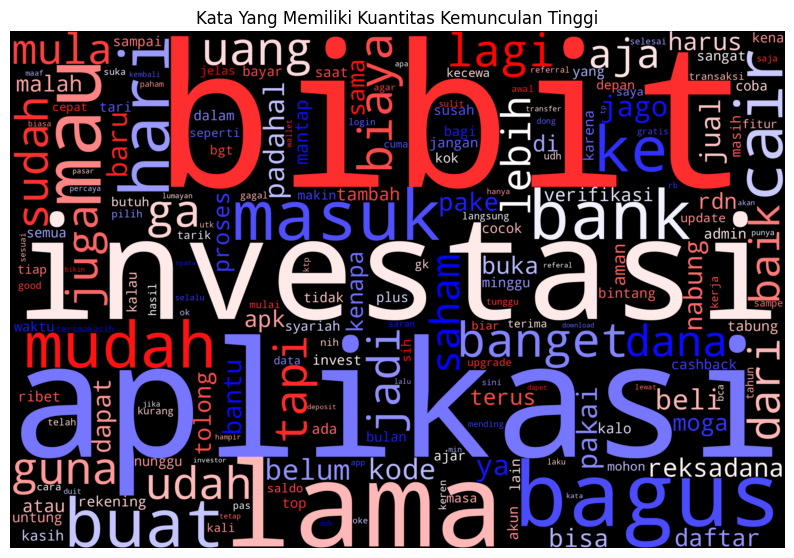

In [37]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


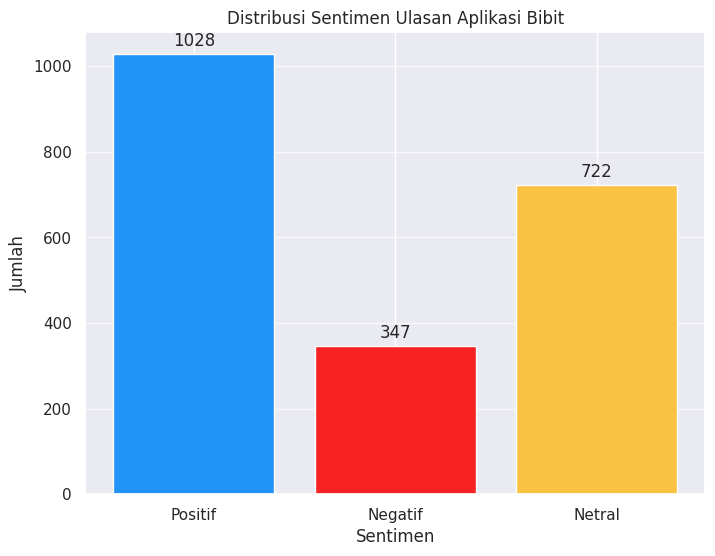

In [38]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Bibit")


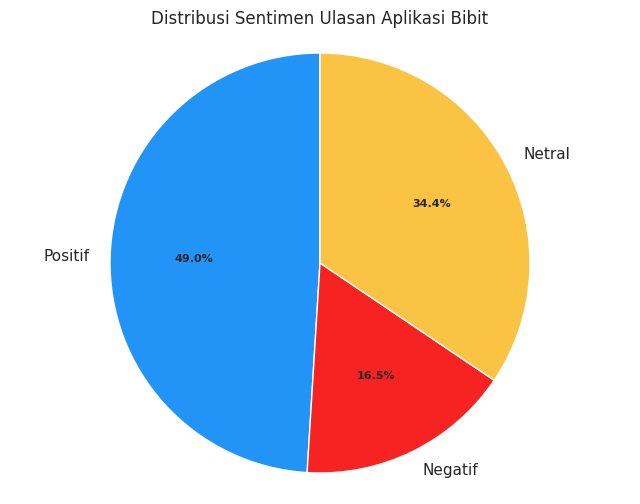

In [39]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Bibit")

In [40]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
1,is ok,is ok,Positif
3,bagus tp cair nunggu beberapa hari hampir minggu,It's nice. But the liquid waits a few days. Al...,Positif
4,sesal pake bibit apk ramah buat nyimpen duit s...,Sorry to use a friendly apk seed to pay a smal...,Positif
5,bagus bgt investasi sedikit demi sedikit baru ...,"Great investment, little by little, just tryin...",Positif
7,selamat pagi bapakibu kenapa rdn wallet jago t...,"Good morning, Father. Why didn't the great wal...",Positif
...,...,...,...
2091,sngt bagus ok bgt,"It's good, okay?",Positif
2092,kata biaya sembunyi tapi begitu jual aset jual...,"The word ""hidden fee"" but once you sell the as...",Negatif
2093,layan baik tapi selesai masalah,Layers are good but problem solved,Positif
2094,mudah investasi bibit,It's easy to invest seeds,Positif


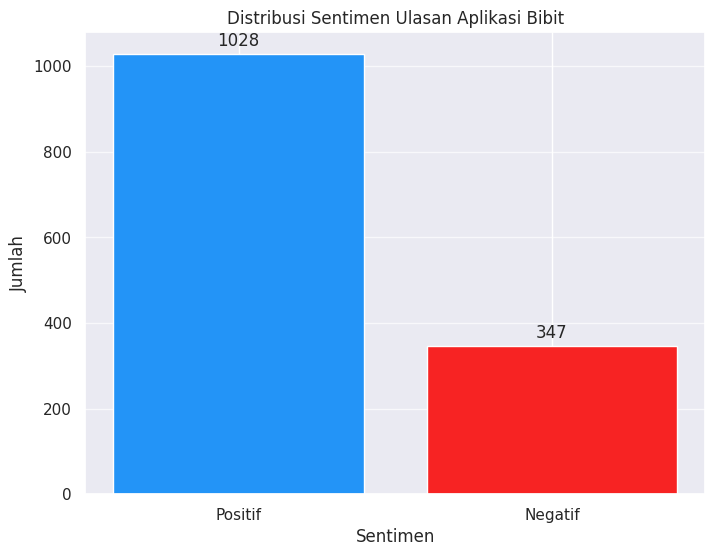

In [41]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Bibit")


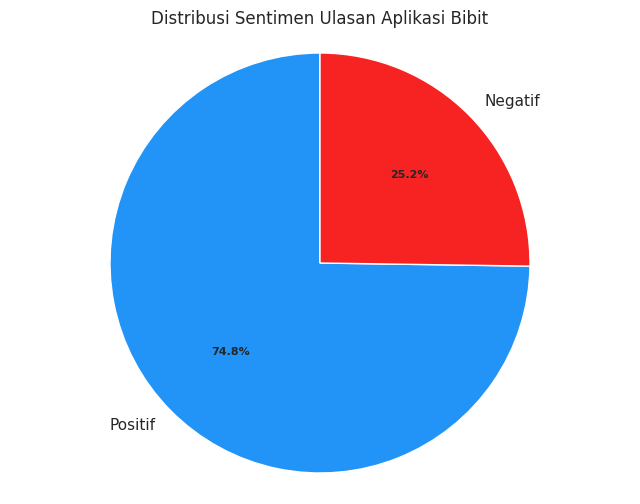

In [42]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Bibit")

In [43]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
1,is ok,is ok,0
3,bagus tp cair nunggu beberapa hari hampir minggu,It's nice. But the liquid waits a few days. Al...,0
4,sesal pake bibit apk ramah buat nyimpen duit s...,Sorry to use a friendly apk seed to pay a smal...,0
5,bagus bgt investasi sedikit demi sedikit baru ...,"Great investment, little by little, just tryin...",0
7,selamat pagi bapakibu kenapa rdn wallet jago t...,"Good morning, Father. Why didn't the great wal...",0
...,...,...,...
2091,sngt bagus ok bgt,"It's good, okay?",0
2092,kata biaya sembunyi tapi begitu jual aset jual...,"The word ""hidden fee"" but once you sell the as...",1
2093,layan baik tapi selesai masalah,Layers are good but problem solved,0
2094,mudah investasi bibit,It's easy to invest seeds,0


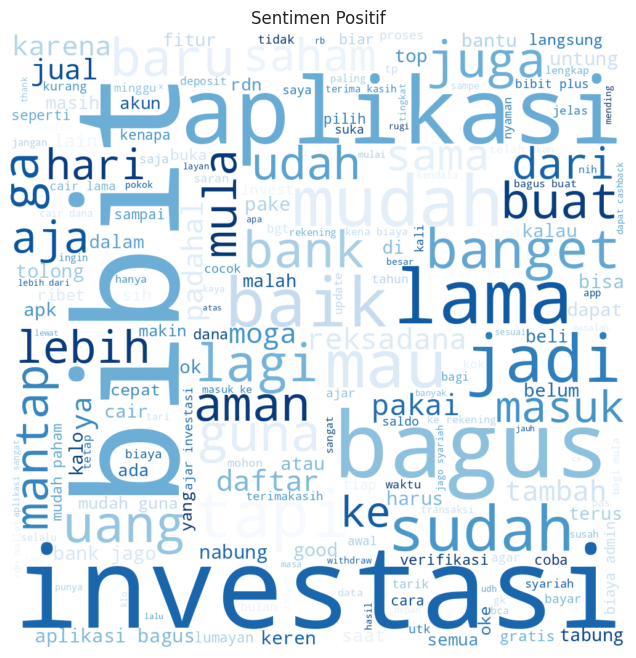

In [44]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

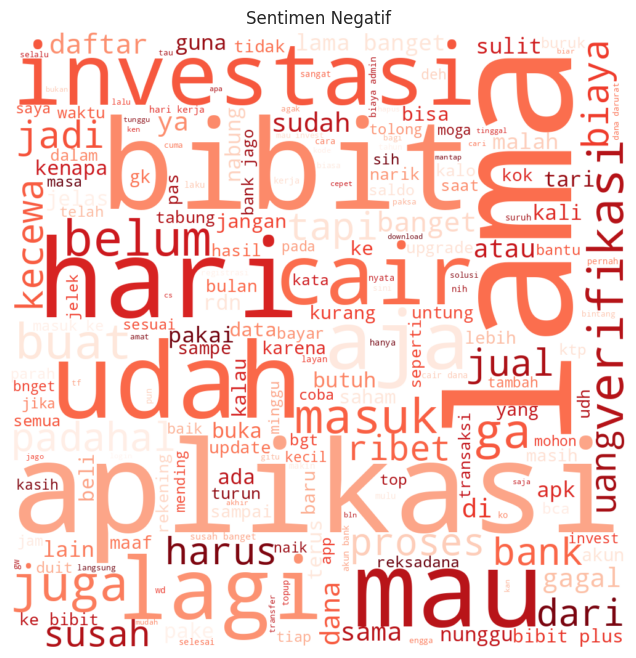

In [45]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

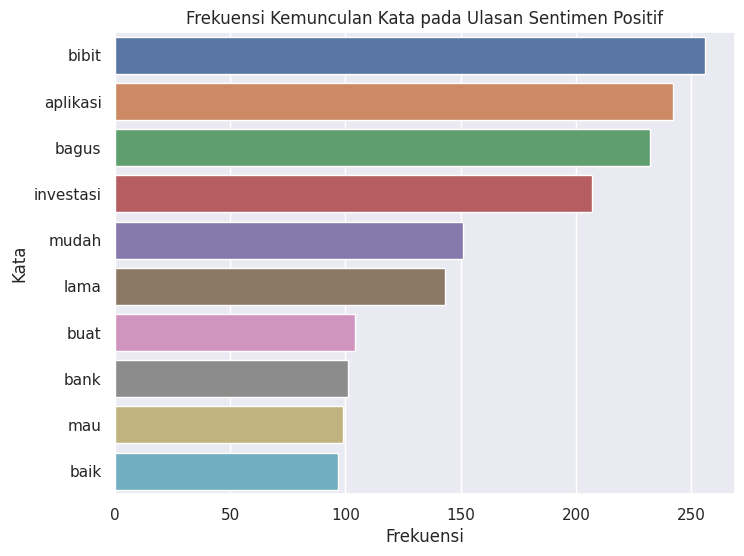

In [46]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [47]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

     kata  frekuensi
    bibit        256
 aplikasi        242
    bagus        232
investasi        207
    mudah        151
     lama        143
     buat        104
     bank        101
      mau         99
     baik         97


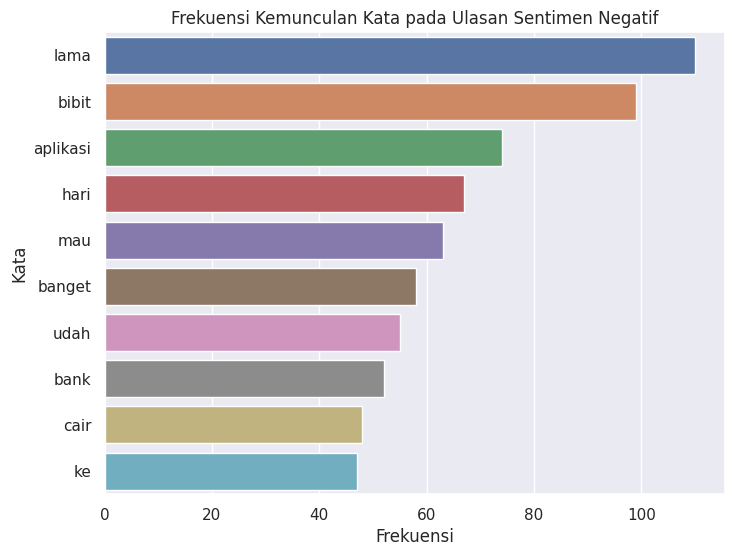

In [48]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [49]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
    lama        110
   bibit         99
aplikasi         74
    hari         67
     mau         63
  banget         58
    udah         55
    bank         52
    cair         48
      ke         47


In [50]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

sentimen
0    1028
1     347
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [51]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [52]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [53]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

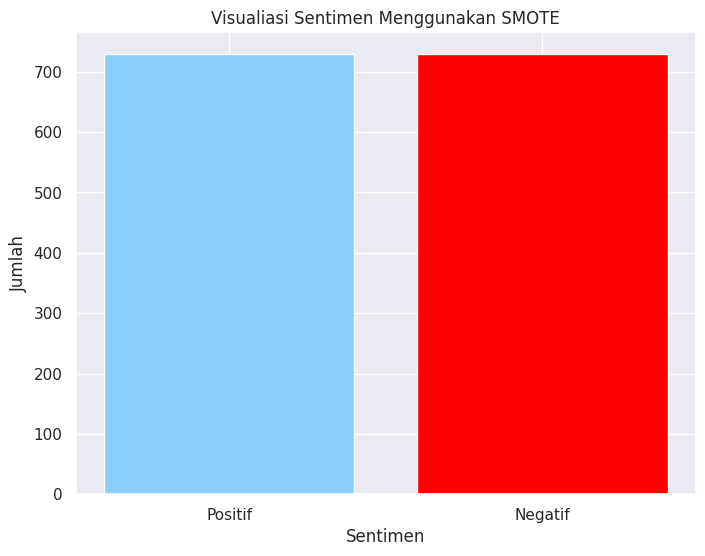

In [54]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [55]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [56]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.7723970944309927
Akurasi untuk c = 0.05: 0.7796610169491526
Akurasi untuk c = 0.25: 0.784503631961259
Akurasi untuk c = 0.5: 0.784503631961259
Akurasi untuk c = 0.75: 0.7966101694915254
Akurasi untuk c = 1: 0.801452784503632


In [58]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [59]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.801452784503632 


In [60]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.8015

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       299
           1       0.65      0.62      0.63       114

    accuracy                           0.80       413
   macro avg       0.75      0.75      0.75       413
weighted avg       0.80      0.80      0.80       413



In [61]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[260  39]
 [ 43  71]]

True Positives (TP) =  260

True Negatives (TN) =  71

False Positives (FP) =  39

False Negatives (FN) =  43

Accuracy =  0.801452784503632


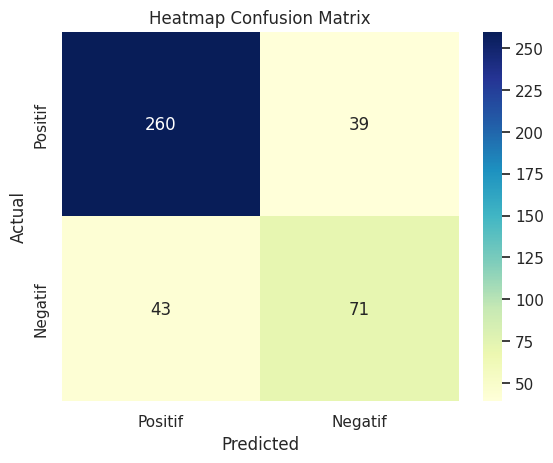

In [62]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [63]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [64]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8015


In [65]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1985


# **Testing**

In [66]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Menurut pendapatku mengenai aplikasi bibit bagus untuk invesment pemula krna fitur nya mudah & sangat mudah di pahami, setelah saya memakai bibit alhamdulillah bisa mendapatkan keuntungan walaupun tdak terlalu besar, sangat bagus banget untuk pemula
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 92.54%
Probabilitas: 92.54341866193 %


In [73]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Verivikasi dan pencairan dananya terlalu lama, . Sangat disayangkan
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 59.45%
Probabilitas: 59.45020711592046 %
